Максимум функции: z = 0.00 в точке (0.00, 0.00)
Минимум функции (ограниченный): z = 0.00 в точке (0.00, 0.00)


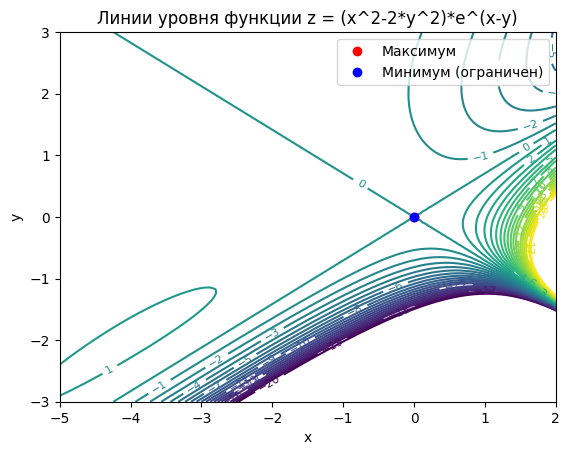

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Определение функции
def f(x, y):
  return (x**2 - 2*y**2) * np.exp(x - y)

# Создание сетки значений x и y
x = np.linspace(-5, 2, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Вычисление значений функции на сетке
Z = f(X, Y)

# Построение линий уровня
fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z, levels=range(-20, 20))
ax.clabel(contour, inline=True, fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Линии уровня функции z = (x^2-2*y^2)*e^(x-y)')

# Нахождение экстремумов
def neg_f(params):
  x, y = params
  return -f(x, y)

# Начальное приближение
x0 = [0, 0]

# Поиск минимума (что соответствует максимуму исходной функции)
result_max = minimize(neg_f, x0)
x_max, y_max = result_max.x
z_max = -result_max.fun

# Поиск минимума (он находится на бесконечности, поэтому ограничим область поиска)
result_min = minimize(lambda x: f(x[0], x[1]), x0, bounds=[(-5, 2), (-3, 3)])
x_min, y_min = result_min.x
z_min = result_min.fun

# Отображение экстремумов на графике
ax.plot(x_max, y_max, 'ro', label='Максимум')
ax.plot(x_min, y_min, 'bo', label='Минимум (ограничен)')
ax.legend()

# Вывод координат и значений экстремумов
print(f'Максимум функции: z = {z_max:.2f} в точке ({x_max:.2f}, {y_max:.2f})')
print(f'Минимум функции (ограниченный): z = {z_min:.2f} в точке ({x_min:.2f}, {y_min:.2f})')

plt.show()

In [2]:
import numpy as np

def extremum_check(f, x0, y0):
    """
    Вычисляет значения первых и вторых частных производных функции f(x, y)
    в точке (x0, y0), а также значения главных миноров матрицы Гессе.

    Args:
        f: Функция двух переменных (lambda-функция).
        x0: Координата x точки.
        y0: Координата y точки.

    Returns:
        tuple: Кортеж, содержащий:
            - Словарь с значениями первых и вторых частных производных.
            - Список значений главных миноров матрицы Гессе.
    """

    # Вычисляем первые частные производные
    df_dx = lambda x, y: 2*x - 2/x
    df_dy = lambda x, y: 2*y - 18/y

    # Вычисляем вторые частные производные
    d2f_dx2 = lambda x, y: 2 + 2/(x**2)
    d2f_dy2 = lambda x, y: 2 + 18/(y**2)
    d2f_dxdy = lambda x, y: 0  # В данном случае смешанная производная равна 0

    # Вычисляем значения производных в точке (x0, y0)
    derivatives = {
        'df_dx': df_dx(x0, y0),
        'df_dy': df_dy(x0, y0),
        'd2f_dx2': d2f_dx2(x0, y0),
        'd2f_dy2': d2f_dy2(x0, y0),
        'd2f_dxdy': d2f_dxdy(x0, y0)
    }

    # Формируем матрицу Гессе
    hessian_matrix = np.array([
        [derivatives['d2f_dx2'], derivatives['d2f_dxdy']],
        [derivatives['d2f_dxdy'], derivatives['d2f_dy2']]
    ])

    # Вычисляем главные миноры
    minor1 = hessian_matrix[0, 0]
    minor2 = np.linalg.det(hessian_matrix)

    return derivatives, [minor1, minor2]

# --- Основная часть программы ---

# Определяем функцию
f = lambda x, y: x**2 + y**2 - 2*np.log(x) - 18*np.log(y)

# Находим стационарные точки (где первые производные равны 0)
# Вручную решаем систему уравнений: 2x - 2/x = 0 и 2y - 18/y = 0
stationary_points = [(1, 3)]  # Единственная точка (1, 3)

# Проверяем выполнение условий экстремума для каждой стационарной точки
for x0, y0 in stationary_points:
    derivatives, minors = extremum_check(f, x0, y0)

    print(f"Точка ({x0}, {y0}):")
    print(f"  Частные производные: {derivatives}")
    print(f"  Главные миноры: {minors}")

    # Проверка достаточного условия экстремума
    if minors[0] > 0 and minors[1] > 0:
        print("  -> Локальный минимум")
    elif minors[0] < 0 and minors[1] > 0:
        print("  -> Локальный максимум")
    else:
        print("  -> Невозможно определить тип экстремума (седловая точка или нет)")

Точка (1, 3):
  Частные производные: {'df_dx': 0.0, 'df_dy': 0.0, 'd2f_dx2': 4.0, 'd2f_dy2': 4.0, 'd2f_dxdy': 0}
  Главные миноры: [4.0, 15.999999999999998]
  -> Локальный минимум


In [23]:
from sympy import symbols, diff, exp, solve, Matrix

def find_stationary_points_and_extrema(u):
    """
    Находит стационарные точки функции u(x, y, z) и определяет их тип
    (минимум, максимум, седловая точка) с помощью критерия Сильвестра.
    """
    x, y, z = symbols('x y z')
    u_x = diff(u, x)
    u_y = diff(u, y)
    u_z = diff(u, z)

    # Находим стационарные точки
    critical_points = solve((u_x, u_y, u_z), (x, y, z))

    # Вычисляем вторые производные
    u_xx = diff(u_x, x)
    u_yy = diff(u_y, y)
    u_zz = diff(u_z, z)
    u_xy = diff(u_x, y)
    u_xz = diff(u_x, z)
    u_yz = diff(u_y, z)

    results = []
    '''
    H(f(x₀, y₀, z₀)) = 
    | ∂²f/∂x² (x₀, y₀, z₀)   ∂²f/∂x∂y (x₀, y₀, z₀)   ∂²f/∂x∂z (x₀, y₀, z₀) |
    | ∂²f/∂y∂x (x₀, y₀, z₀)   ∂²f/∂y² (x₀, y₀, z₀)   ∂²f/∂y∂z (x₀, y₀, z₀) |
    | ∂²f/∂z∂x (x₀, y₀, z₀)   ∂²f/∂z∂y (x₀, y₀, z₀)   ∂²f/∂z² (x₀, y₀, z₀) |
    '''
    for point in critical_points:
        # Гессиан в точке
        H = Matrix([
            [u_xx.subs({x: point[0], y: point[1], z: point[2]}), u_xy.subs({x: point[0], y: point[1], z: point[2]}), u_xz.subs({x: point[0], y: point[1], z: point[2]})],
            [u_xy.subs({x: point[0], y: point[1], z: point[2]}), u_yy.subs({x: point[0], y: point[1], z: point[2]}), u_yz.subs({x: point[0], y: point[1], z: point[2]})],
            [u_xz.subs({x: point[0], y: point[1], z: point[2]}), u_yz.subs({x: point[0], y: point[1], z: point[2]}), u_zz.subs({x: point[0], y: point[1], z: point[2]}) ]
        ])

        # Проверка критерия Сильвестра
        minors = [H[:i, :i].det() for i in range(1, 4)]
        if all(minor > 0 for minor in minors):
            point_type = 'минимум)'
        elif minors[0] < 0 and minors[1] > 0 and minors[2] < 0:  # Правильная проверка
            point_type = 'максимум)'
        else:
            point_type = 'седловая точка или неопределенность)'

        results.append((point, point_type))

    return results

# Пример использования функции
x, y, z = symbols('x y z')
u = (x + 7*z) * exp(-(2*x**2 + 3*y**2 + z**2))
extrema_points = find_stationary_points_and_extrema(u)

# Вывод результатов
for point, point_type in extrema_points:
    print(f"Точка: {point}, Тип: {point_type}")

Точка: (-sqrt(11)/66, 0, -7*sqrt(11)/33), Тип: минимум)
Точка: (sqrt(11)/66, 0, 7*sqrt(11)/33), Тип: максимум)
